### Some stuff to talk about

1. It's a great idea to include the versions you're using at the beginning or end of the notebook.  I show a simple way to do that.
1. The bulk of this notebook is just a fast exercise in prepping some data and fitting and evaluating a model.
1. Often we have functions (or create functions) that we'd like to share with this and other notebooks.  I'll talk about a couple of ways to do that.  The benefit is that we avoid copying and pasting functions (and having to maintain them in multiple places).

#### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn.datasets

In [2]:
!pip show pandas numpy sklearn matplotlib seaborn | findstr Version

Version: 0.24.2
Version: 1.16.4
Version: 3.1.0
Version: 0.9.0


#### Get some data

In [3]:
iris = sklearn.datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
the_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [7]:
the_data['target'] = iris['target']

In [8]:
the_data['target_name'] = pd.Series(the_data.target).map(dict(zip([0, 1, 2], iris['target_names'])))

In [9]:
the_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


---

#### Get ready to train and test a model by choosing training and test set.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(the_data.iloc[:,0:3],the_data.target , test_size=0.30, random_state=13)

#### Choose a model and instantiate.

In [12]:
from sklearn.linear_model import LogisticRegression

#### Fit the model and make predictions on test set.

In [13]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predictions = model.predict(X_test)

#### Evaluate the model by comparing predictions with ground truth.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.67      0.70        12
           2       0.80      0.84      0.82        19

    accuracy                           0.84        45
   macro avg       0.84      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45



In [17]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0  8  4]
 [ 0  3 16]]


##### Now I want to call a function I've written.  But how to import?


Note: If you're still working on the function this jupyter extension is useful (docs here: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html):

```
# Load the "autoreload" extension
%load_ext autoreload
%autoreload 2
```

This tells jupyter to always reload the file so you get the latest version.

Note: in the discussion below, I'm working with a file 'plot_confusion_matrix.py' with a single function definition for the function 'plot_confusion_matrix'.

###### If the definition is in a file in the same directory as the execution notebook, you can just do this.

In [18]:
#from plot_confusion_matrix import plot_confusion_matrix

In [19]:
#plot_confusion_matrix(confusion_matrix(y_test, predictions), iris['target_names'])

##### If it's not in the same directory, this is one way you to set it up.

In [20]:
# for the python way
import os
import sys

##### Let's say it's in a src directory at the same level as this notebook.

In [21]:
src_dir = os.path.join(os.getcwd(), 'src'); src_dir

'C:\\Users\\saus\\Documents\\repos\\sample\\src'

##### The following cell appends the src directory to the system path (in the shell this notebook is executing, i.e. only for this execution of this notebook.)

In [22]:
sys.path.append(src_dir)

In [23]:
sys.path

['C:\\Users\\saus\\Documents\\repos\\sample',
 'C:\\Users\\saus\\Anaconda3\\python37.zip',
 'C:\\Users\\saus\\Anaconda3\\DLLs',
 'C:\\Users\\saus\\Anaconda3\\lib',
 'C:\\Users\\saus\\Anaconda3',
 '',
 'C:\\Users\\saus\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\saus\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\saus\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\saus\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\saus\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\saus\\.ipython',
 'C:\\Users\\saus\\Documents\\repos\\sample\\src']

##### Now you can just import the file like another library.  Note: you need to have a file __init__.py in the src directory so python understands it is a module.

In [24]:
from plot_confusion_matrix import plot_confusion_matrix

Confusion matrix, without normalization
[[14  0  0]
 [ 0  8  4]
 [ 0  3 16]]


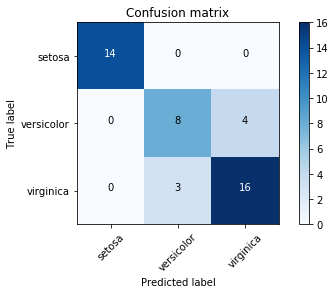

In [25]:
plot_confusion_matrix(confusion_matrix(y_test, predictions), iris['target_names'])